In [1]:
# import sys
# !{sys.executable} -m pip install -U plotly
# !{sys.executable} -m pip install -U kaleido


In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.DataFrame({
    "Month": ["Jan", "Feb", "Mar", "Apr", "May"],
    "Revenue": [100, 150, 200, 300, 250],
    "Cumulative": [100, 250, 450, 750, 1000],
    "Growth %": [5, 10, 15, 25, 20]
})
df.head()

,Month,Revenue,Cumulative,Growth %
0,Jan,100,100,5
1,Feb,150,250,10
2,Mar,200,450,15
3,Apr,300,750,25
4,May,250,1000,20


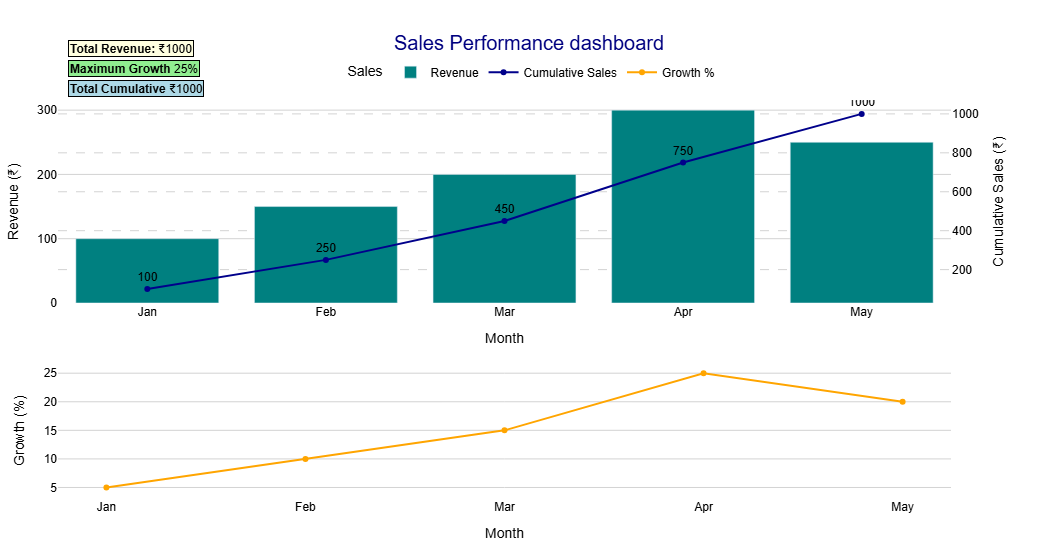

In [3]:
fig = make_subplots(
    rows=2,
    cols=1,
    specs=[[{"secondary_y":True}],[{}]],
    row_heights=[0.6,0.4]
)

fig.add_trace(
    go.Bar(
        x=df['Month'],
        y=df['Revenue'],
        name='Revenue'
    ),
    secondary_y=False,
    row=1,col=1
)
fig.add_trace(
    go.Scatter(
        x=df['Month'],
        y=df['Cumulative'],
        name='Cumulative Sales',
        text=df['Cumulative'],
        textposition='top center',
        mode='lines+markers+text'
    ),
    secondary_y=True,
    row=1,col=1
)
fig.add_trace(
    go.Scatter(
    x=df['Month'],
    y=df['Growth %'],
    name='Growth %'),
    row=2,col=1
)
fig.update_yaxes(title='Revenue (₹)',showgrid=True, gridcolor="lightgrey",secondary_y=False,row=1)
fig.update_yaxes(title='Growth (%)',showgrid=True, gridcolor="lightgrey",row=2)
fig.update_yaxes(title='Cumulative Sales (₹)',showgrid=True,gridcolor="lightgrey",griddash='dash',secondary_y=True,row=1)
fig.update_xaxes(title='Month')
fig.update_layout(title=dict(
    text='Sales Performance dashboard',
    font=dict(size=20,color='navy'),
    x=0.5,xanchor='center'
    ),
    legend=dict(
        title='Sales',
        font=dict(size=12,color='black'),
        y=1.07,yanchor='middle',
        x=0.5,xanchor='center',
        orientation='h'
    ),
    plot_bgcolor='white',
    height=550,
    font=dict(family="Arial", size=12, color="black"),
     margin=dict(l=50, r=50, t=100, b=50),
                  
)
total_revenue=df['Revenue'].sum()
max_growth=df['Growth %'].max()
total_cumulative=df['Cumulative'].max()
fig.update_layout(
    annotations=[
        dict(text=f"<b>Total Revenue:</b> ₹{total_revenue}",
            x=0.01,xref='paper',y=1.15,yref='paper',xanchor='left',
            showarrow=False,
            bordercolor='black',
            bgcolor='lightyellow'),

        dict(text=f"<b>Maximum Growth</b> {max_growth}%",
        x=0.01,xref='paper',y=1.1,yref='paper',xanchor='left',
        showarrow=False,
        bordercolor='black',
        bgcolor='lightgreen'),

        dict(text=f"<b>Total Cumulative</b> ₹{total_cumulative}",
        x=0.01,xref='paper',y=1.05,yref='paper',xanchor='left',
        showarrow=False,
        bordercolor='black',
        bgcolor='lightblue')
    ]
)

fig.data[0].marker.color = 'teal'        
fig.data[0].hovertemplate = "Month: %{x}<br>Revenue: ₹%{y}"
fig.data[2].line.color = 'orange'      
fig.data[2].hovertemplate = "Month: %{x}<br>Growth: %{y}%"
fig.data[1].line.color = 'darkblue'
fig.data[1].hovertemplate = "Month: %{x}<br>Cumulative: ₹%{y}"

fig.show()

In [4]:
fig.write_image("Sales_Dashboard.png", scale=3)